In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests as req
from bs4 import BeautifulSoup

In [43]:
alphabet = list('АБВГДЕЖЗИКЛМНОПРСТУФХЦЧШЩЭЮЯ') #Пропущены Ё и Й

In [44]:
p = []
for l in alphabet:
    url = f'https://wordsonline.ru/{l}'
    r = req.get(url) #Получаем url сайта со словами
    soup = BeautifulSoup(r.text, 'lxml')
    pages = soup.find('ul', class_='pagination')
    links = pages.find_all('a')

    for link in links:
        pageNum = int(link.text) if link.text.isdigit() else None
        if pageNum != None:
            hrefval = link.get('href')
            x = int(''.join([i for i in list(hrefval) if i.isdigit()==True]))
            p.append(x)               

In [45]:
a=[] #Кол-во страниц для каждой буквы       
for i in range(len(p)):
    if p[i]==2:
        if p[i+1]!=3:
            a.append(2)
        else:
            if i+1!=len(p)-1:
                if p[i+2]>3:
                    a.append(p[i+3])
                else:
                    a.append(3) 
            else:
                a.append(3)
                
print(a)         

[35, 41, 67, 34, 45, 3, 7, 46, 29, 66, 23, 48, 65, 76, 182, 52, 94, 39, 26, 18, 13, 7, 11, 14, 2, 15, 2, 3]


In [46]:
#Скрипт для извлечения слов из онлайн-словаря

# items=[] #Список, в котором будут храниться все слова
# for l,i in zip(alphabet, a):
#     for j in range(1, i+1):
#         url = f'https://wordsonline.ru/{l}?page={j}'
#         r = req.get(url) #Получаем url сайта со словами
#         soup = BeautifulSoup(r.text, 'lxml')
#         item = soup.find_all('div', class_='col-sm-3 col-xs-6') #Находим элемент сайта, содержащий слова

#         for i in item:
#             i = i.get_text(' ', strip=True)
#             for j in i.split():
#                 items.append(j)

# len(items)

# #Превратим список со словами в текстовый файл
# with open('Russian_dictionary.txt', 'w') as f:
#     for item in items:
#         f.write("%s\n" % item)

### Словарь готов!

In [47]:
#Впредь будем извлекать слова из созданного текстового файла для экономии времени
with open('Russian_dictionary.txt') as f:
    items = f.readlines()
items = [x.strip().lower() for x in items] 

In [48]:
counter=0
letter_words=[]
for j in alphabet:
    for i in items:
        if i[0].upper()==j:
            counter+=1
    letter_words.append(counter)
    counter=0
print(letter_words) #Кол-во слов на каждую букву

[5142, 6051, 10035, 5049, 6619, 442, 1005, 6871, 4238, 9814, 3407, 7125, 9605, 11296, 27243, 7776, 14033, 5711, 3829, 2605, 1886, 983, 1603, 2018, 259, 2202, 238, 450]


In [49]:
glasnaya = [1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1]
df = pd.DataFrame({'буква':alphabet, 'кол-во слов':letter_words, 'гласность':glasnaya})
df['гласность'] = df['гласность'].apply(lambda x: 'гласная' if x==1 else 'согласная')

yo = pd.DataFrame({'буква':'Ё', 'кол-во слов':32, 'гласность':'гласная'}, index=[5.5])
ikr = pd.DataFrame({'буква':'Й', 'кол-во слов':77, 'гласность':'гласная'}, index=[8.5])
tvzn = pd.DataFrame({'буква':'Ъ', 'кол-во слов':0, 'гласность':'другое'}, index=[24])
bl = pd.DataFrame({'буква':'Ы', 'кол-во слов':0, 'гласность':'гласная'}, index=[24.5])
mzn = pd.DataFrame({'буква':'Ь', 'кол-во слов':0, 'гласность':'другое'}, index=[24.5])

In [50]:
df = df.append(yo, ignore_index=False)
df = df.append(ikr, ignore_index=False)
df = df.append(tvzn, ignore_index=False)
df = df.append(bl, ignore_index=False)
df = df.append(mzn, ignore_index=False)
df = df.sort_index().reset_index(drop=True)

In [51]:
full_alphabet = [l.lower() for l in list('АБВГДЕЁЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯ')]
counter=0
letters_count=[]

for l in full_alphabet:
    for i in items:
        for j in list(i):
            if j==l:
                counter+=1
    letters_count.append(counter)
    counter=0
print(letters_count) #Кол-во слов на каждую букву

[135635, 24141, 67375, 22509, 36162, 106582, 7159, 10317, 28502, 124680, 51473, 64724, 61646, 34971, 114888, 148150, 52183, 98287, 89676, 113914, 32903, 9168, 9921, 13107, 21380, 11567, 6654, 595, 47196, 53292, 3409, 4305, 30819]


In [52]:
df['кол-во букв'] = letters_count

In [53]:
df

,буква,кол-во слов,гласность,кол-во букв
0,А,5142,гласная,135635
1,Б,6051,согласная,24141
2,В,10035,согласная,67375
3,Г,5049,согласная,22509
4,Д,6619,согласная,36162
5,Е,442,гласная,106582
6,Ё,32,гласная,7159
7,Ж,1005,согласная,10317
8,З,6871,согласная,28502
9,И,4238,гласная,124680


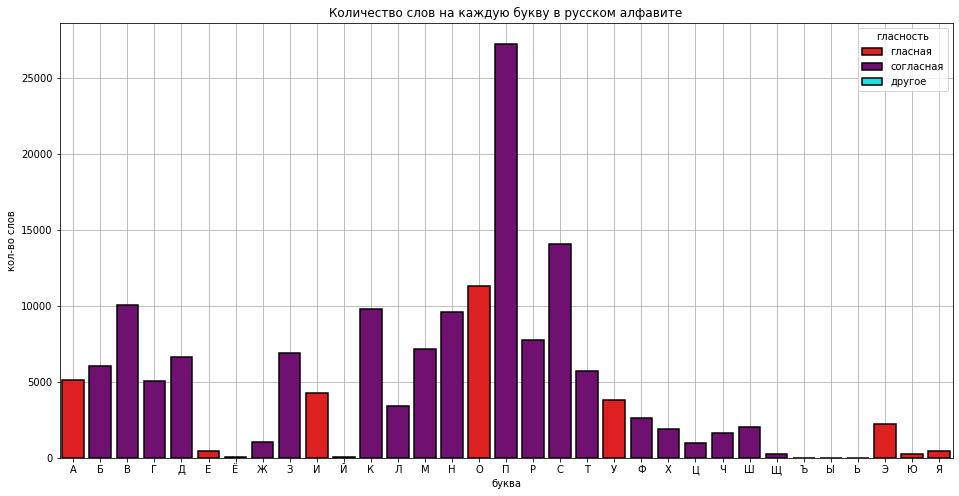

In [54]:
plt.figure(figsize=(16,8))
sns.barplot(data=df, x='буква', y='кол-во слов', hue='гласность', zorder=2, ec='k', 
            lw=1.5, dodge = False, palette=["r", "purple", 'cyan'])
plt.grid(True)
plt.title('Количество слов на каждую букву в русском алфавите')
plt.show()

In [55]:
lengths=[len(i) for i in items] #длины слов

In [56]:
max(lengths)

38

In [57]:
longest_word = [i for i in items if len(i)==38]
longest_word #Самое длинное слово

['сельскохозяйственно-машиностроительный']

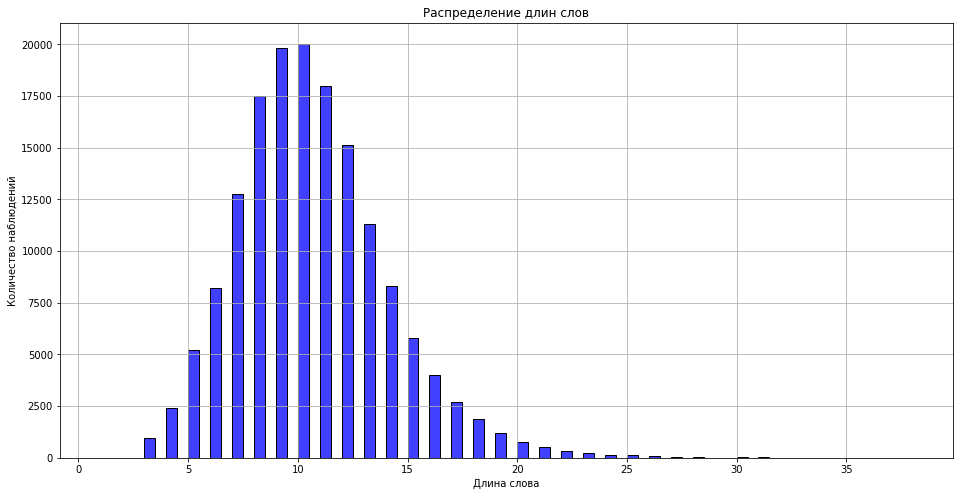

In [58]:
plt.figure(figsize=(16,8))
sns.histplot(lengths, color='b', binwidth=0.5)
plt.grid(True)
plt.title('Распределение длин слов')
plt.xlabel('Длина слова')
plt.ylabel('Количество наблюдений')
plt.show()

In [59]:
letters=[] #Буквы со всех слов
for i in items:
    for j in list(i):
        letters.append(j)

In [60]:
len(letters)

1643492

In [61]:
len(letters_count)

33

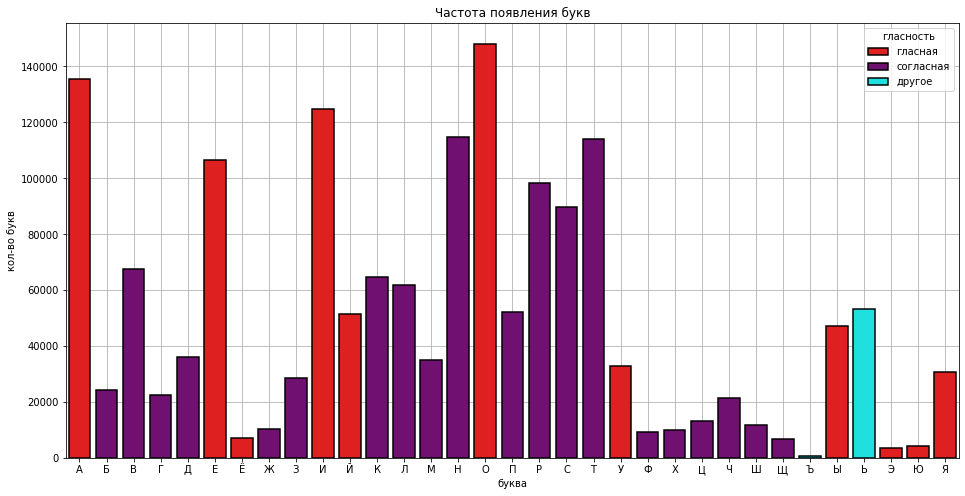

In [62]:
plt.figure(figsize=(16,8))
sns.barplot(data=df, x='буква', y='кол-во букв', hue='гласность', zorder=2, ec='k', lw=1.5, 
            dodge = False, palette=["r", "purple",'cyan'])
plt.grid(True)
plt.title('Частота появления букв')
plt.show()

In [63]:
words = items[::10000]

In [64]:
print(words)

['аароновец', 'брехун', 'высватываться', 'доволочь', 'зверовать', 'колёсопрокатный', 'марионеточный', 'начатый', 'оклахомцы', 'перекисать', 'полиэтилен', 'прокисание', 'реформироваться', 'сонантный', 'трёхчасовой', 'целесообразность']


In [65]:
len(words)

16

In [66]:
start = -1
count = 0
all_pos = []


for l in full_alphabet:
    pos = []
    for i in items:        
        while True:
            start = i.find(l, start+1)
            if start == -1:
                break
            pos.append(start+1)
    all_pos.append(pos) #Положение всех букв в слове

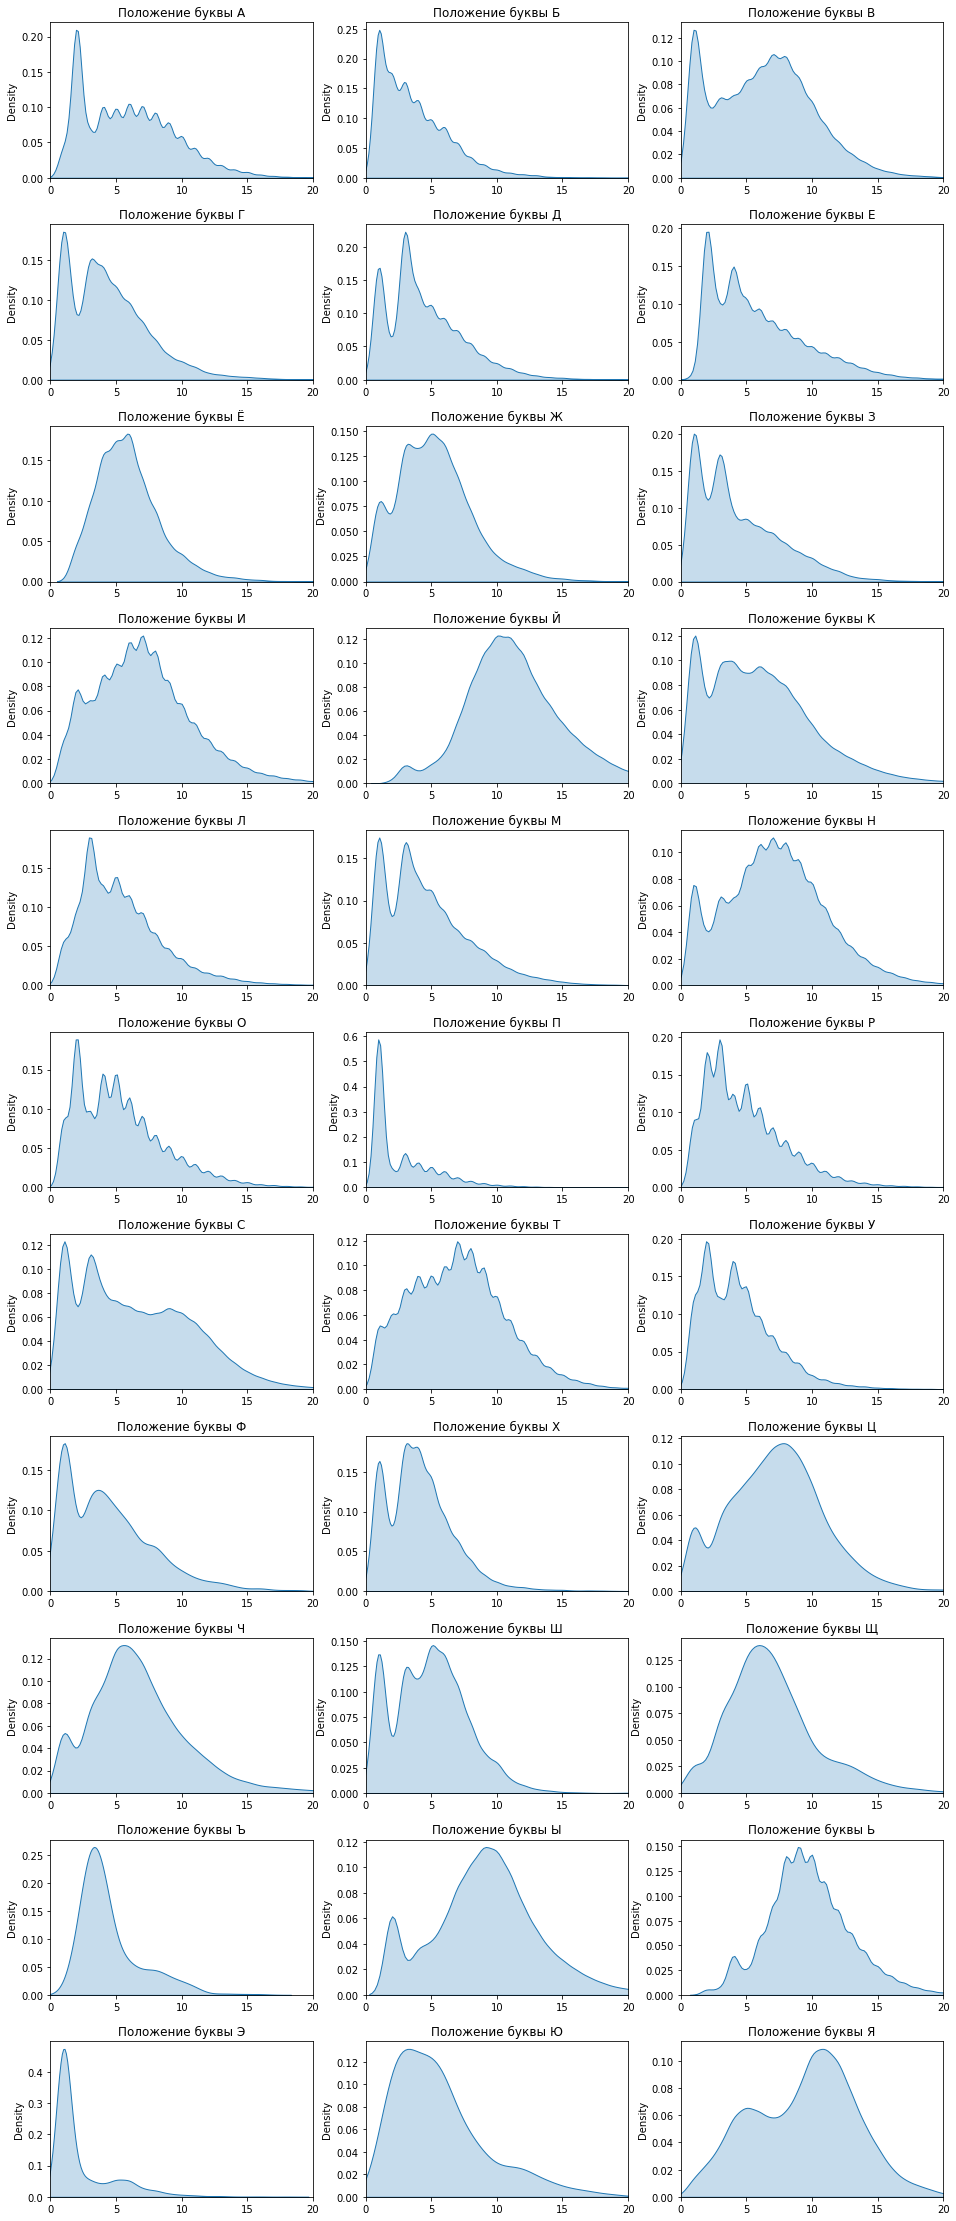

In [67]:
fig = plt.figure(figsize=(16, 40))
fig.subplots_adjust(hspace=0.3, wspace=0.2)
for n,i,l in zip(range(1, 34), all_pos, df['буква']):
    plt.subplot(11, 3, n)
    sns.kdeplot(i, bw_adjust=1.2, palette='viridis', fill=True)
    plt.title(f'Положение буквы {l}')
    plt.xlim(0, 20)
    plt.xticks([0,5,10,15,20])
plt.show()